# **Jet Man Global**

## 1. Overview

This project analysis dataset is from [Aviation Accident Database & Synopses, up to 2023](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/code) to find the probable cause in aviation business.<br /> The most equitable actions can be taken to produce quality analysis for a start-up business like Jet Flight by looking at historical data.

## II. Data Understanding

The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents globally.<br />The dataset is comprises of **31 columns** and **88,889 entries**. However, even with so much information, the dataset contains more than 30% of missing<br /> values and syntax errors.

We believe that the "success" of aviation business can be measured by use of quality aircraft, by considering make and model less involved in accidents<br />
and also the aviation service you consider venturing in

Note: The **Aviation Accident Database & Synopses, up to 2023** dataset is provided zipped in our data folder and needs to be unzipped for data analysis.

### Imports Required

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Access and Read Data
I am reading my csv file using the [pandas library](https://pandas.pydata.org/docs/reference/index.html). The pandas function in the cell below reads csv files. 
It takes two parameters: 
1. A data file. (required)  
2. An encoding byte. (optional) 

In [11]:
df_original = pd.read_csv("data/AviationData.csv", encoding='ISO-8859-1')
df_original.head()

C:\Users\User\AppData\Local\Temp\ipykernel_19556\1365299643.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("data/AviationData.csv", encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Display information about our data and get better visual understanding

In [12]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

**Create a copy** of the original data to avoid confusion during cleaning and imputation.

In [13]:
new_aviation_data = df_original.copy()

## III. Data Preparation
This step ensures data is in suitable state for analysing, visualizing and deriving suitable insights to solve the business problem.
 
I am will be:
1. Cleaning raw data.
2. Organizing raw data.

In [14]:
# Display information from our newly created copy of dataset 
new_aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

### Data Cleaning
* Correcting errors
* Handling missing values
* Removing duplicates
* Dropping unnecessary columns

From the code cell above, we can see the **naming convention of columns** does not align with programmers rule.

The column names contain a dot in between, which is wrong for programmers. So, we need to ensure it is correct.

In [15]:
'''In this code cell, I will replace the '.' with '_' in every column name
using the pandas replace method '''

new_aviation_data.columns = new_aviation_data.columns.str.replace('.', '_')
new_aviation_data.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

Identify any occurrence of missing values and return the number of counts it appears in each column of our dataset.

In [16]:
new_aviation_data.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38757
Airport_Name              36185
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1382
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines          6084
Engine_Type                7096
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6384
Publication_Date          13771
dtype: i

In [17]:
'''replacing unknown, NONE, None values with nan, which mostly likely appears in
many datasets.'''
new_aviation_data = new_aviation_data.replace(["Unknown", "unknown", "NONE", "None",'<br /><br />'], np.nan)

In [18]:
new_aviation_data['Make'] = new_aviation_data['Make'].replace({'CESSNA': 'Cessna', 'PIPER': 'Piper'})

In [19]:
new_aviation_data['Weather_Condition'] = new_aviation_data['Weather_Condition'].replace('Unk', 'UNK')

**Remove Duplicates**

Check for the count of duplicates in every column

In [20]:
'''created a function to iterate over each column 
and check for duplicates and their count.'''

def column_duplicates():
    for data_cols in new_aviation_data.columns:
        print(f'{data_cols}: = {new_aviation_data[data_cols].duplicated().sum()}' )

In [21]:
# call the column_duplicates function to print each column with its count of duplicates

column_duplicates()

Event_Id: = 938
Investigation_Type: = 88887
Accident_Number: = 26
Event_Date: = 74107
Location: = 61131
Country: = 88670
Latitude: = 63296
Longitude: = 61732
Airport_Code: = 78515
Airport_Name: = 64020
Injury_Severity: = 88779
Aircraft_damage: = 88885
Aircraft_Category: = 88874
Registration_Number: = 9787
Make: = 80655
Model: = 76573
Amateur_Built: = 88886
Number_of_Engines: = 88881
Engine_Type: = 88878
FAR_Description: = 88858
Schedule: = 88885
Purpose_of_flight: = 88863
Air_carrier: = 75301
Total_Fatal_Injuries: = 88763
Total_Serious_Injuries: = 88838
Total_Minor_Injuries: = 88831
Total_Uninjured: = 88509
Weather_Condition: = 88885
Broad_phase_of_flight: = 88877
Report_Status: = 71815
Publication_Date: = 85964


**Primary Key**

Event_id is my primary key which should be considered unique. I will check for duplicates and delete the entire row from my dataset.

In [22]:
'''Returns True if the column contains duplicates'''
new_aviation_data['Event_Id'].duplicated().any()

np.True_

In [23]:
# False - unique values
# True - duplicates
'''get the count of unique values and duplicates'''
new_aviation_data['Event_Id'].duplicated().value_counts()

Event_Id
False    87951
True       938
Name: count, dtype: int64

In [24]:
# Drop all duplicates by Event_Id column
# use ignore_index in the methods parameter to also update indexing
new_aviation_data = new_aviation_data.drop_duplicates(subset = ['Event_Id'], ignore_index=True )
new_aviation_data

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,NaN,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87946,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
87947,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87948,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
87949,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [25]:
# Total count of null values after dropping events_id duplicates
new_aviation_data.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     53
Country                     225
Latitude                  53739
Longitude                 53748
Airport_Code              39948
Airport_Name              36073
Injury_Severity             990
Aircraft_damage            3222
Aircraft_Category         55784
Registration_Number        1700
Make                         85
Model                       100
Amateur_Built               100
Number_of_Engines          6027
Engine_Type                9062
FAR_Description           56056
Schedule                  75591
Purpose_of_flight         12731
Air_carrier               71434
Total_Fatal_Injuries      11267
Total_Serious_Injuries    12322
Total_Minor_Injuries      11760
Total_Uninjured            5863
Weather_Condition          4473
Broad_phase_of_flight     27661
Report_Status              6531
Publication_Date          13599
dtype: i

In [26]:
''' call the column_duplicates function to 
print each column with its count of duplicates.
Confirm Events_id has no duplicates '''

column_duplicates()

Event_Id: = 0
Investigation_Type: = 87949
Accident_Number: = 0
Event_Date: = 73169
Location: = 60206
Country: = 87732
Latitude: = 62358
Longitude: = 60794
Airport_Code: = 77577
Airport_Name: = 63082
Injury_Severity: = 87841
Aircraft_damage: = 87947
Aircraft_Category: = 87936
Registration_Number: = 9586
Make: = 79752
Model: = 75720
Amateur_Built: = 87948
Number_of_Engines: = 87943
Engine_Type: = 87940
FAR_Description: = 87921
Schedule: = 87947
Purpose_of_flight: = 87925
Air_carrier: = 74415
Total_Fatal_Injuries: = 87825
Total_Serious_Injuries: = 87900
Total_Minor_Injuries: = 87893
Total_Uninjured: = 87571
Weather_Condition: = 87947
Broad_phase_of_flight: = 87939
Report_Status: = 70877
Publication_Date: = 85026


**Dropping rows**

In this step I will be dropping dataset rows that correspond with null values in the specified columns:
* Country
* Location
* Publication_Date

In [27]:
# dropping the rows using code below

new_aviation_data = new_aviation_data.dropna(subset=['Location','Publication_Date']).reset_index()
new_aviation_data.shape

(74311, 32)

**Dropping columns** 

In this section i will drop columns that will not be considered in creating my insights.

Here are the columns: 'Latitude', 'Longitude', 'Air_carrier' ,'Schedule' ,'Aircraft_Category' ,'FAR_Description' ,'Airport_Code' ,'Airport_Name'

In [28]:
new_aviation_data = new_aviation_data.drop(columns=['Injury_Severity','Registration_Number', 'Latitude','Longitude','Air_carrier','Schedule','Aircraft_Category','FAR_Description','Airport_Code','Airport_Name' ])
new_aviation_data.shape

(74311, 22)

In [29]:
# display columns after I dropped a few.
new_aviation_data.columns

Index(['index', 'Event_Id', 'Investigation_Type', 'Accident_Number',
       'Event_Date', 'Location', 'Country', 'Aircraft_damage', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight', 'Report_Status', 'Publication_Date'],
      dtype='object')

**Handling Missing Values**

Display each Column and its null counts as Percentage

In [30]:
''' Get the mean of each column and multiply by 100,
to make it a percentage number '''

new_aviation_data.isna().mean() * 100

index                      0.000000
Event_Id                   0.000000
Investigation_Type         0.000000
Accident_Number            0.000000
Event_Date                 0.000000
Location                   0.000000
Country                    0.222040
Aircraft_damage            3.523032
Make                       0.104964
Model                      0.122458
Amateur_Built              0.115730
Number_of_Engines          6.694837
Engine_Type               10.013322
Purpose_of_flight         14.096163
Total_Fatal_Injuries      14.902235
Total_Serious_Injuries    16.199486
Total_Minor_Injuries      15.427057
Total_Uninjured            7.584341
Weather_Condition          4.837776
Broad_phase_of_flight     35.202056
Report_Status              7.416130
Publication_Date           0.000000
dtype: float64

**Missing Values**

Dealing with missing values in each column in our dataset

In [31]:
''' Make column
filling missing values with mode'''

new_aviation_data['Make'] = new_aviation_data['Make'].fillna(new_aviation_data['Make'].mode()[0])

In [32]:
''' Model column
filling missing values with mode'''

new_aviation_data['Model'] = new_aviation_data['Model'].fillna(new_aviation_data['Model'].mode()[0])

In [33]:
''' weather Condition column
filling missing values with mode'''

new_aviation_data['Weather_Condition'] = new_aviation_data['Weather_Condition'].fillna(new_aviation_data['Weather_Condition'].mode()[0])

In [34]:
''' Amateur Built column
filling missing values with mode'''

new_aviation_data['Amateur_Built'] = new_aviation_data['Amateur_Built'].fillna(new_aviation_data['Amateur_Built'].mode()[0])

In [35]:
''' Number_of_Engines column
filling missing values with mode'''

new_aviation_data['Number_of_Engines'] = new_aviation_data['Number_of_Engines'].fillna(new_aviation_data['Number_of_Engines'].mode()[0])

In [36]:
''' Country column
filling missing values with mode'''

new_aviation_data['Country'] = new_aviation_data['Country'].fillna(new_aviation_data['Country'].mode()[0])

In [37]:
''' Engine_Type column
filling missing values with mode'''

new_aviation_data['Engine_Type'] = new_aviation_data['Engine_Type'].fillna(new_aviation_data['Engine_Type'].mode()[0])

In [38]:
''' Report_Status column
filling missing values with mode'''

new_aviation_data['Report_Status'] = new_aviation_data['Report_Status'].fillna(new_aviation_data['Report_Status'].mode()[0])

In [39]:
''' Purpose_of_flight column
filling missing values with mode'''

new_aviation_data['Purpose_of_flight'] = new_aviation_data['Purpose_of_flight'].fillna(new_aviation_data['Purpose_of_flight'].mode()[0])

In [40]:
''' Aircraft_damage column
filling missing values with mode'''

new_aviation_data['Aircraft_damage'] = new_aviation_data['Aircraft_damage'].fillna(new_aviation_data['Aircraft_damage'].mode()[0])

In [41]:
''' Total_Serious_Injuries column
filling missing values with mode'''

new_aviation_data['Total_Serious_Injuries'] = new_aviation_data['Total_Serious_Injuries'].fillna(np.ceil(new_aviation_data['Total_Serious_Injuries'].mean()))

# convert values to integers
new_aviation_data['Total_Serious_Injuries'] = new_aviation_data['Total_Serious_Injuries'].astype(int)

In [42]:
''' Total_Uninjured column
filling missing values with mode'''

new_aviation_data['Total_Uninjured'] = new_aviation_data['Total_Uninjured'].fillna(np.ceil(new_aviation_data['Total_Uninjured'].mean()))
new_aviation_data['Total_Uninjured'] = new_aviation_data['Total_Uninjured'].astype(int)

In [43]:
''' Total_Minor_Injuries column
filling missing values with mode'''

new_aviation_data['Total_Minor_Injuries'] = new_aviation_data['Total_Minor_Injuries'].fillna(np.ceil(new_aviation_data['Total_Minor_Injuries'].mean()))
new_aviation_data['Total_Minor_Injuries'] = new_aviation_data['Total_Minor_Injuries'].astype(int)

In [44]:
''' Total_Fatal_Injuries column
filling missing values with mode'''

new_aviation_data['Total_Fatal_Injuries'] = new_aviation_data['Total_Fatal_Injuries'].fillna(np.ceil(new_aviation_data['Total_Fatal_Injuries'].mean()))
new_aviation_data['Total_Fatal_Injuries'] = new_aviation_data['Total_Fatal_Injuries'].astype(int)

In [45]:
''' Broad_phase_of_flight column
filling missing values with mode'''

new_aviation_data['Broad_phase_of_flight'] = new_aviation_data['Broad_phase_of_flight'].fillna(new_aviation_data['Broad_phase_of_flight'].mode()[0])

In [46]:
# updated shape of my dataset
new_aviation_data.shape

(74311, 22)

In [47]:
new_aviation_data.isna().sum()

index                     0
Event_Id                  0
Investigation_Type        0
Accident_Number           0
Event_Date                0
Location                  0
Country                   0
Aircraft_damage           0
Make                      0
Model                     0
Amateur_Built             0
Number_of_Engines         0
Engine_Type               0
Purpose_of_flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Broad_phase_of_flight     0
Report_Status             0
Publication_Date          0
dtype: int64

## IV. Data Analysis

Get the **top 10 aircraft involved in accidents** according to their make.

Here, we wanted to identify planes that are highly at risk to accidents and avoid purchase.

In [48]:
# Top 10 aircrafts by their make
top_10_Make = new_aviation_data['Make'].value_counts().head(10)
top_10_Make

Make
Cessna      22186
Piper       12171
Beech        3468
Bell         1692
Boeing       1259
BEECH        1004
BOEING        997
Robinson      868
Mooney        866
Grumman       806
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cessna'),
  Text(1, 0, 'Piper'),
  Text(2, 0, 'Beech'),
  Text(3, 0, 'Bell'),
  Text(4, 0, 'Boeing'),
  Text(5, 0, 'BEECH'),
  Text(6, 0, 'BOEING'),
  Text(7, 0, 'Robinson'),
  Text(8, 0, 'Mooney'),
  Text(9, 0, 'Grumman')])

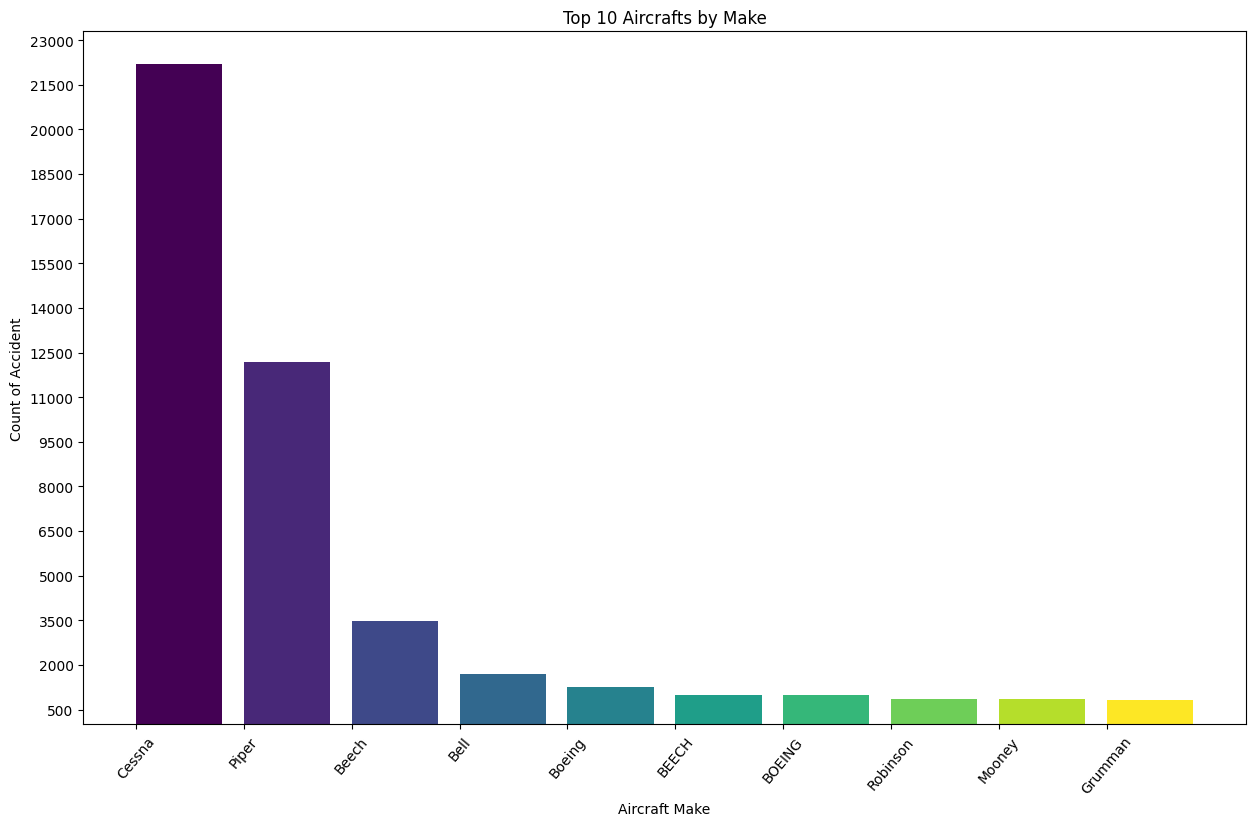

In [49]:
# plot a bar graph showing a visualisation of high risk accidents
fig, ax = plt.subplots(figsize=(15, 9))

x = top_10_Make.index
y = top_10_Make.values
# bar colors
cmap = plt.get_cmap('viridis', len(top_10_Make))
colors = cmap(range(len(top_10_Make)) )

ax.set(
    title = "Top 10 Aircrafts by Make", 
    xlabel = "Aircraft Make",
    ylabel = "Count of Accident",
    # customised ticks
    yticks = [(value * 10**3) for value in np.arange(0.5,24,1.5)]
)

ax.bar(x, y, align='edge', color=colors)
# ax.bar(x[0], y[:1], width=0.85, align='edge', edgecolor='#e0c122')

plt.xticks(rotation=50)


Here are the Aircraft Make to consider purchasing for a startup business, because they portray low risk of accidents

In [50]:
''' Low risk Aircrafts by Make 
This type of make shows a low count of accidents'''

bottom_10_Make = new_aviation_data['Make'].value_counts().tail(10)
bottom_10_Make

Make
SCOTT TERRY G                     1
PERYERA ARNET                     1
BALCOMB KENNETH C III             1
AEROPRAKT MANUFACTURING SP ZOO    1
MCGLAUGHLIN RICHARD               1
EVANS JAMES JAY                   1
ST CLAIR DAVID L                  1
YATES MIKE E                      1
KINGERY MICHAEL C                 1
GREEN L/GILNER D                  1
Name: count, dtype: int64

#### Weather Condition

Here, we are getting a view of how the weather conditions contributed to the accidents

In [51]:
new_aviation_data['Weather_Condition'].value_counts()

Weather_Condition
VMC    68632
IMC     4865
UNK      814
Name: count, dtype: int64

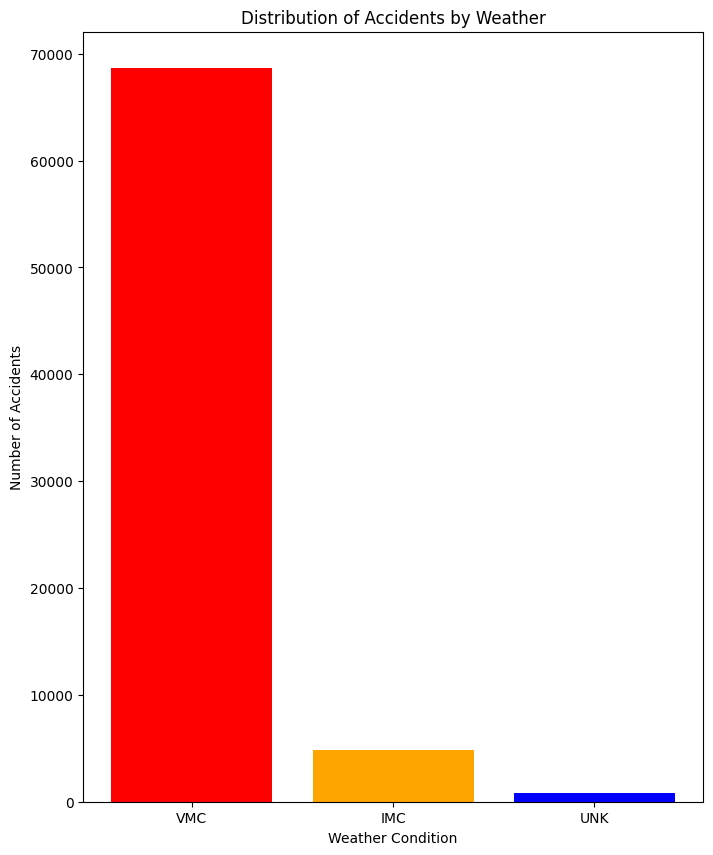

In [52]:
'''From our results below, VMC is a harsh weather condition that can bring
negative impact to the business.
The flight control dispatch department should be very keen concerning the weather.

IMC and UNK are less risky conditions to fly'''

harsh_weather = new_aviation_data['Weather_Condition'].value_counts()

fig, ax = plt.subplots(figsize=(8, 10))

color_Weather = ['Red', 'Orange','Blue','Green']
ax.bar(harsh_weather.index, harsh_weather, color=color_Weather)

ax.set_title('Distribution of Accidents by Weather')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Number of Accidents')

plt.show()

#### Event Date

Formatting the dates when the events occured with respect to number of accidents per year.

In [53]:
'''grabbing the accident year from events date column, keeping only unique
values and sorting them in ascending order'''

date_label = new_aviation_data.loc[ : , 'Event_Date']

# created a new column with only year values called year_label
new_aviation_data['year_label'] = pd.to_datetime(date_label).dt.strftime('%Y')



In [54]:
# confirming whether our column was added to the new dataset
new_aviation_data.shape

(74311, 23)

In [55]:
# columns year_label appears as the last column
new_aviation_data.isna().sum()

index                     0
Event_Id                  0
Investigation_Type        0
Accident_Number           0
Event_Date                0
Location                  0
Country                   0
Aircraft_damage           0
Make                      0
Model                     0
Amateur_Built             0
Number_of_Engines         0
Engine_Type               0
Purpose_of_flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Broad_phase_of_flight     0
Report_Status             0
Publication_Date          0
year_label                0
dtype: int64

#### Purpose_of_flight

As a startup business, we need to identify the risks encountered to consider which service to venture in.

In [56]:
# top 10 high risk aircraft services
new_aviation_data['Purpose_of_flight'].value_counts().head(10)

Purpose_of_flight
Personal               52155
Instructional           9067
Aerial Application      3834
Business                2980
Positioning             1449
Other Work Use          1099
Aerial Observation       689
Public Aircraft          672
Ferry                    643
Executive/corporate      416
Name: count, dtype: int64

In [57]:
# top 10 low risk aircraft services
new_aviation_data['Purpose_of_flight'].value_counts().tail(10)

Purpose_of_flight
Air Race show              98
Public Aircraft - Local    72
Public Aircraft - State    64
Air Race/show              53
Glider Tow                 53
Firefighting               40
Air Drop                   11
ASHO                        5
PUBS                        4
PUBL                        1
Name: count, dtype: int64

In [58]:
new_aviation_data['Purpose_of_flight']

0             Personal
1             Personal
2             Personal
3             Personal
4             Personal
             ...      
74306    Instructional
74307         Personal
74308         Personal
74309         Personal
74310         Personal
Name: Purpose_of_flight, Length: 74311, dtype: object

In [59]:
new_aviation_data['Purpose_of_flight'].value_counts().index[:10]

Index(['Personal', 'Instructional', 'Aerial Application', 'Business',
       'Positioning', 'Other Work Use', 'Aerial Observation',
       'Public Aircraft', 'Ferry', 'Executive/corporate'],
      dtype='object', name='Purpose_of_flight')

Text(0.5, 0.98, 'High risk Aircraft Service')

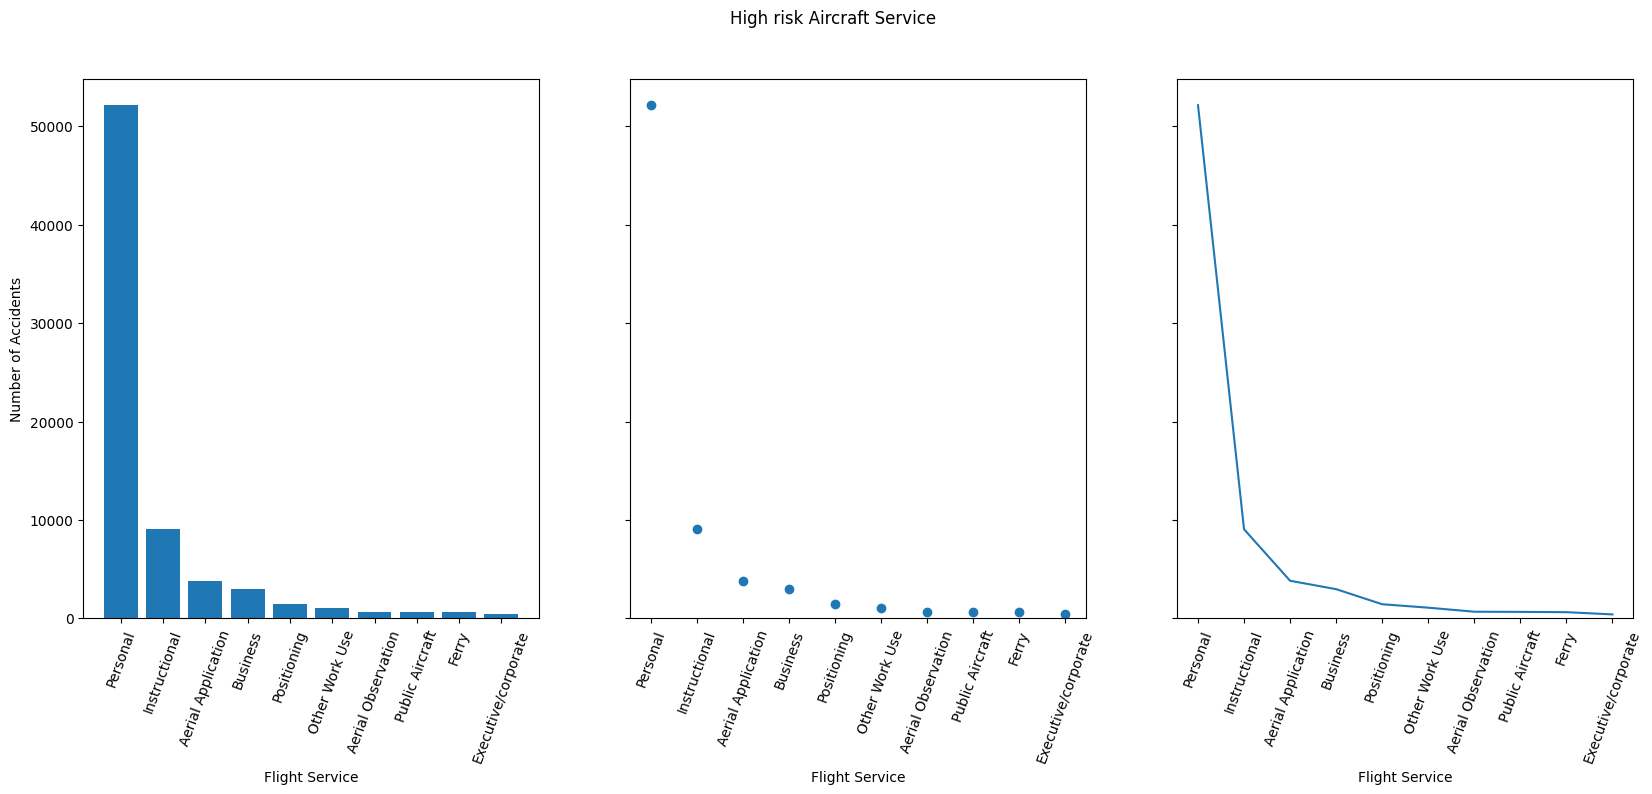

In [60]:
# Highly at risk aircraft service
data = new_aviation_data['Purpose_of_flight'].value_counts()
service = list(data.index[:10])
accidents = list(data.values[:10])

fig, ax = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

ax[0].bar(service, accidents)
ax[1].scatter(service, accidents)
ax[2].plot(service, accidents)

ax[0].set_ylabel('Number of Accidents')

for ax in (ax[0], ax[1], ax[2]):
    ax.tick_params(axis='x', rotation=70)
    ax.set_xlabel('Flight Service')
    



fig.suptitle('High risk Aircraft Service')

Text(0.5, 0.98, 'Low Risk Aircraft Service')

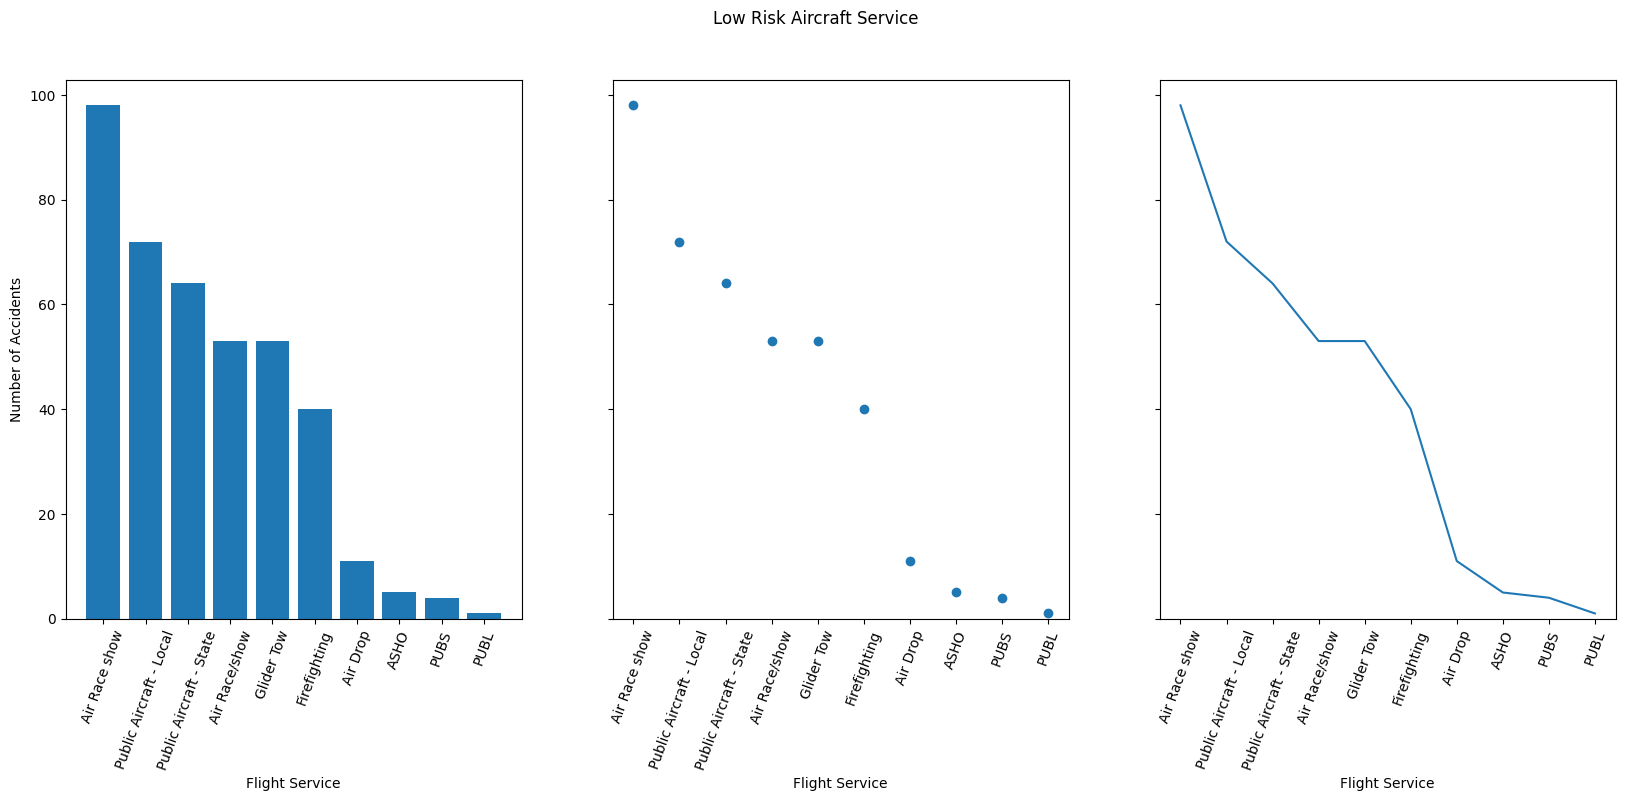

In [61]:
# Low risk aircraft service
data = new_aviation_data['Purpose_of_flight'].value_counts()
service = list(data.index[-10:])
accidents = list(data.values[-10:])

fig, ax = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

ax[0].bar(service, accidents)
ax[1].scatter(service, accidents)
ax[2].plot(service, accidents)

ax[0].set_ylabel('Number of Accidents')

for ax in (ax[0], ax[1], ax[2]):
    ax.tick_params(axis='x', rotation=70)
    ax.set_xlabel('Flight Service')


fig.suptitle('Low Risk Aircraft Service')

In [62]:
new_aviation_data.isna().sum()

index                     0
Event_Id                  0
Investigation_Type        0
Accident_Number           0
Event_Date                0
Location                  0
Country                   0
Aircraft_damage           0
Make                      0
Model                     0
Amateur_Built             0
Number_of_Engines         0
Engine_Type               0
Purpose_of_flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Broad_phase_of_flight     0
Report_Status             0
Publication_Date          0
year_label                0
dtype: int64

In [64]:
new_aviation_data.to_csv("clean_Jet_Man.csv", index = False)